In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('hotel_booking.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [6]:
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [7]:
for col in df.describe(include ='object').columns:
    #print(col)
    print(df[col].unique())

['Resort Hotel' 'City Hotel']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [9]:
#remove unnecessary columns
df.drop(['agent','company','name','email'],axis=1, inplace=True)

In [12]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(118898, 32)

<Axes: >

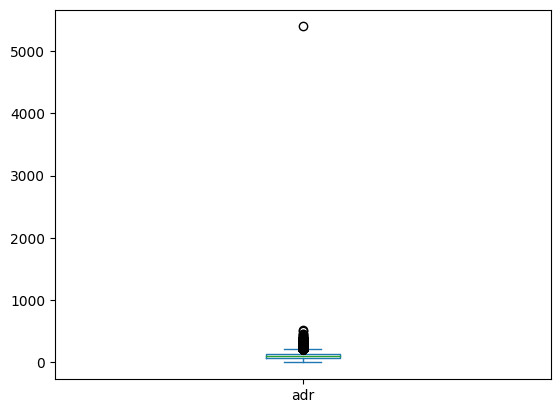

In [15]:
df['adr'].plot(kind='box')

In [17]:
#there is outlier so, we have to remove it
df= df[df['adr']<5000]

<Axes: >

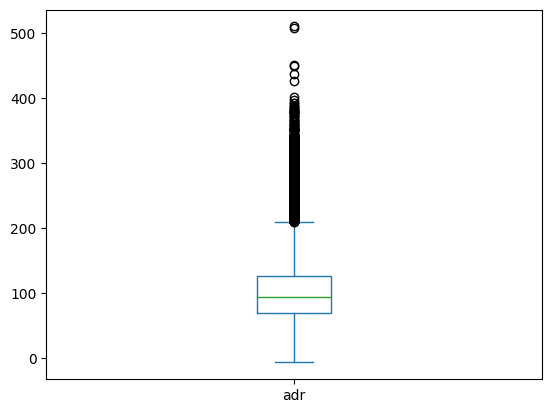

In [18]:
df['adr'].plot(kind='box')

DATA VISUALIZATION

In [19]:
#percentage of cancelled and not cancelled values
cancelled_perc = df['is_canceled'].value_counts(normalize =True)
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

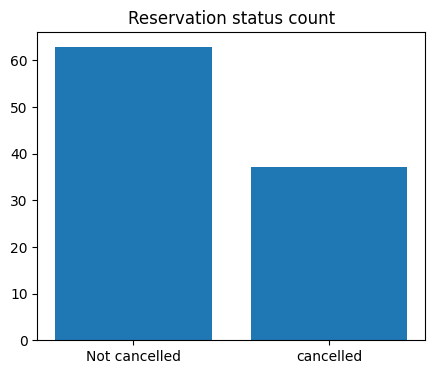

In [20]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not cancelled","cancelled"],df['is_canceled'].value_counts(normalize =True).mul(100))
plt.show()

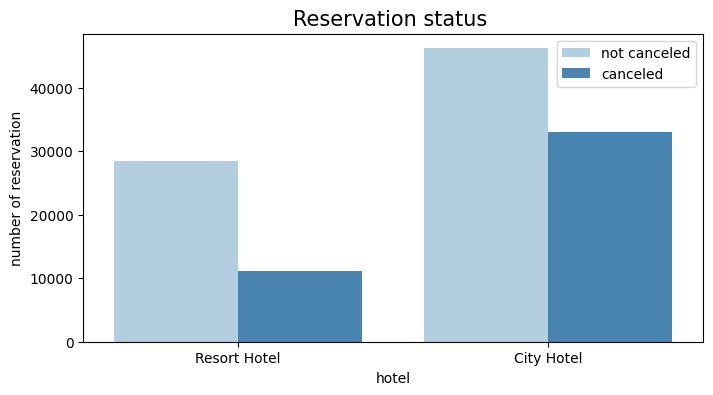

In [21]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel', hue= 'is_canceled' , data = df, palette='Blues')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation status ", size=15)
plt.xlabel('hotel')
plt.ylabel('number of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

In [22]:
resort_hotel = df[df['hotel']=="Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [23]:
city_hotel = df[df['hotel']=="City Hotel"]
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [24]:
resort_hotel =resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel =city_hotel.groupby('reservation_status_date')[['adr']].mean()

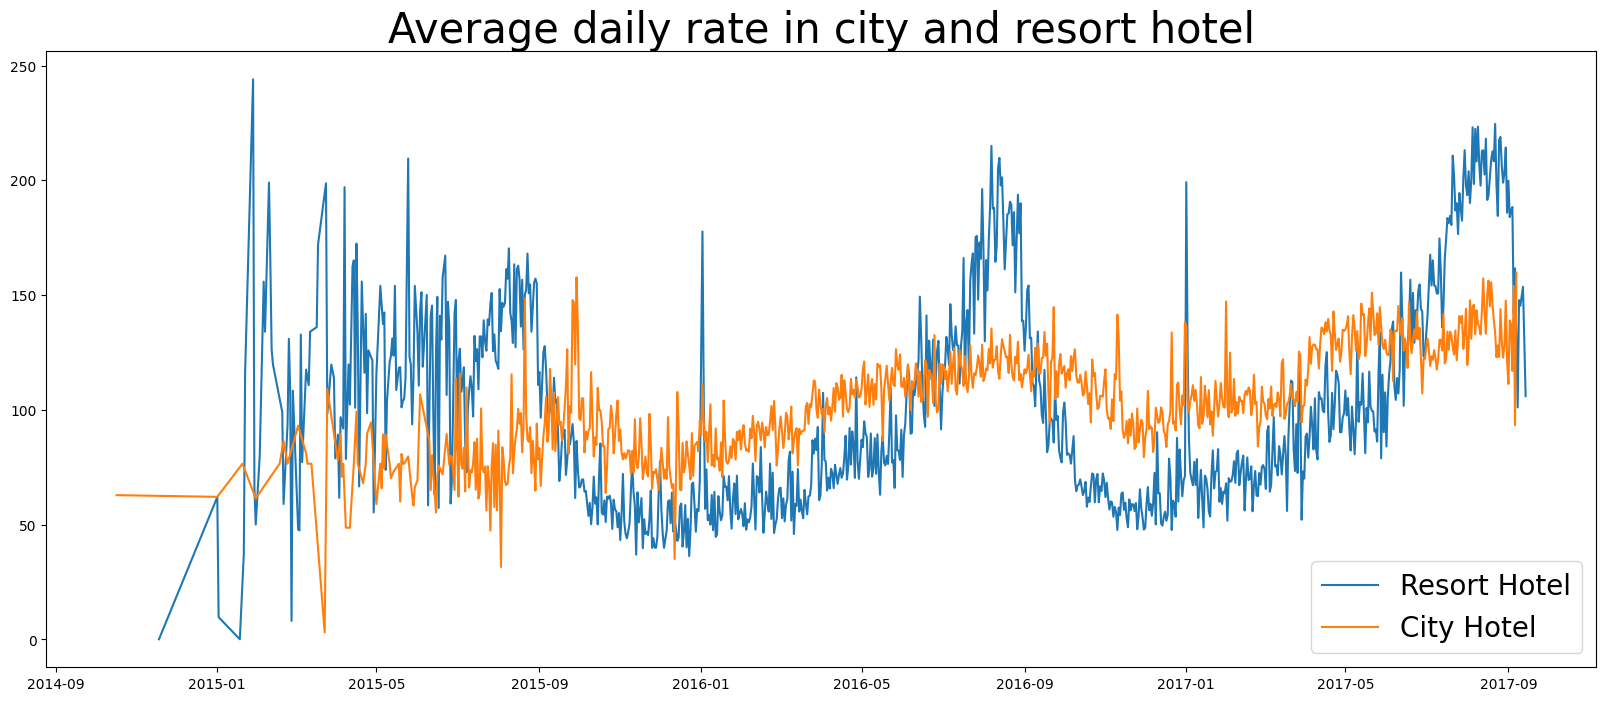

In [25]:
plt.figure(figsize=(20,8))
plt.title("Average daily rate in city and resort hotel", fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

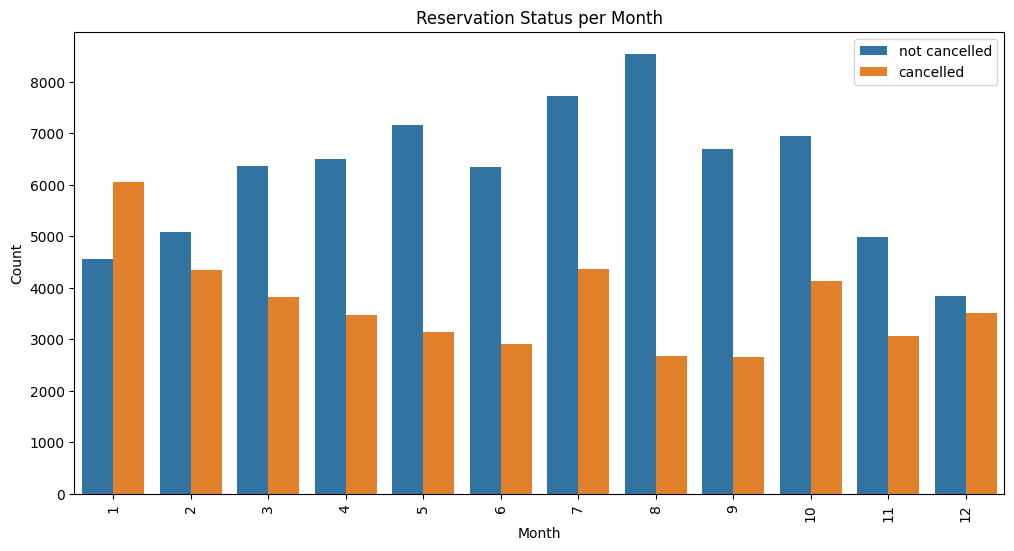

In [26]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='is_canceled')
plt.title('Reservation Status per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(['not cancelled','cancelled'])
plt.xticks(rotation=90)
plt.show()

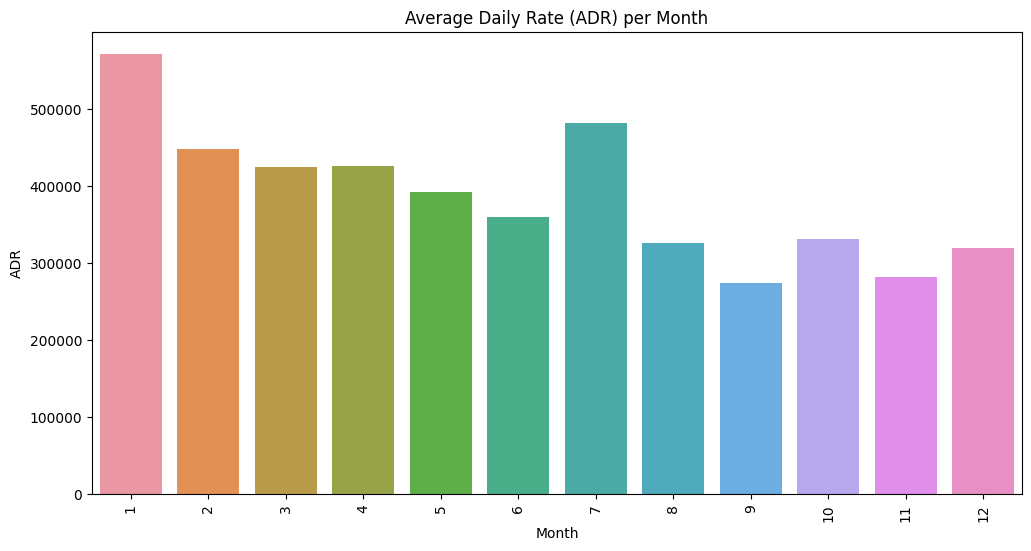

In [27]:
# Calculate average daily rate (ADR) per month
adr_per_month = df[df['is_canceled']==1].groupby('month')['adr'].sum().reset_index()

# Create a bar plot of ADR per month
plt.figure(figsize=(12, 6))
sns.barplot(data=adr_per_month, x='month', y='adr')
plt.title('Average Daily Rate (ADR) per Month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.xticks(rotation=90)
plt.show()

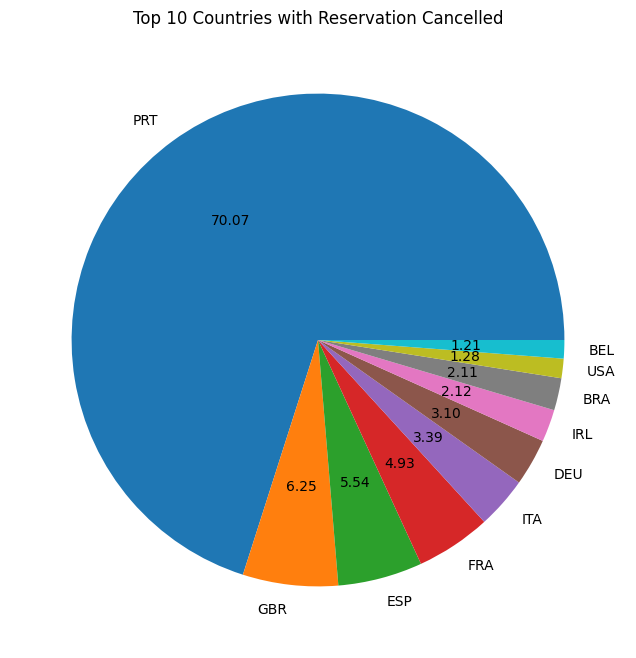

In [28]:
cancelled_data =df[df['is_canceled']==1]
top_10_countries=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Reservation Cancelled')
plt.pie(top_10_countries, autopct='%.2f',labels=top_10_countries.index)
plt.show()

In [29]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [31]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

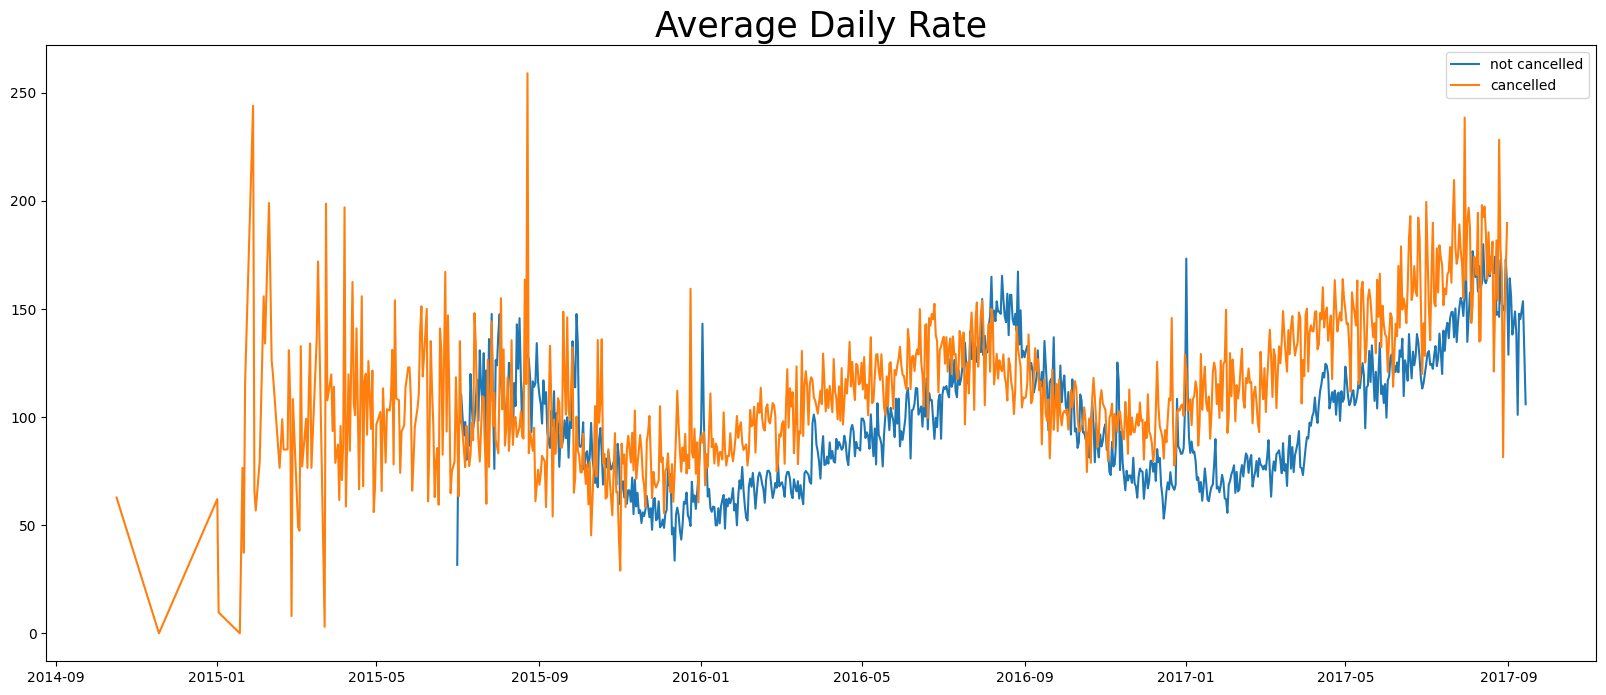

In [38]:
canceled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date', inplace=True)

not_canceled_data =df[df['is_canceled'] ==0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate', fontsize=25)
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='not cancelled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='cancelled')
plt.legend()

In [35]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2016') & (canceled_df_adr['reservation_status_date']<'2017-09')]
not_cancaled_df_adr = not_cancaled_df_adr[(not_cancaled_df_adr['reservation_status_date']>'2016') & (not_cancaled_df_adr['reservation_status_date']<'2017-09')]

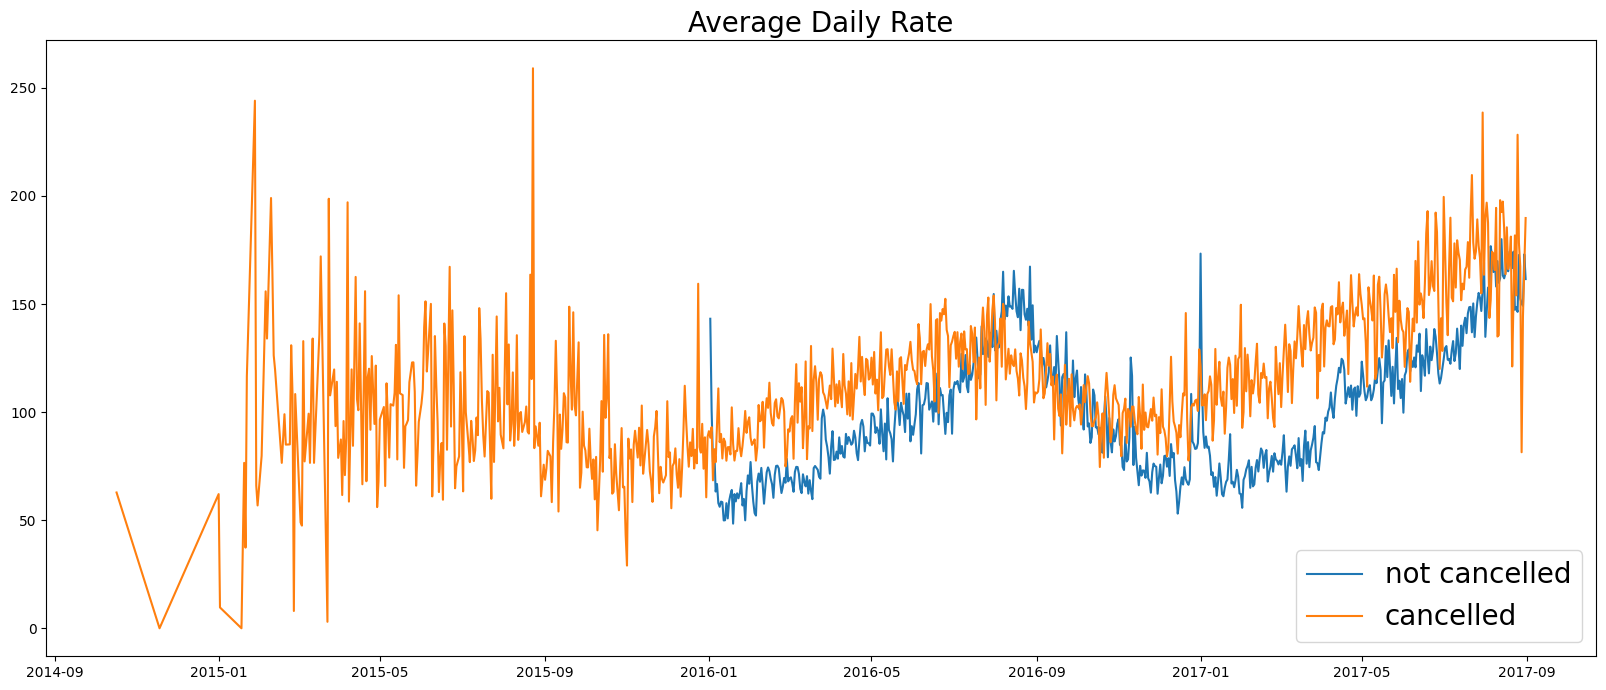

In [39]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate', fontsize=20)
plt.plot(not_cancaled_df_adr['reservation_status_date'], not_cancaled_df_adr['adr'], label='not cancelled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='cancelled')
plt.legend(fontsize=20)